In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_cnn_model(input_shape=(224,224,3), num_classes=6):
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        # Block 2
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        # Block 3
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        # Block 4
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),

        # Fully connected layers
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),   # avoid overfitting
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model = build_cnn_model()
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457,670 (1.75 MB)

 Trainable params: 456,710 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing & augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,       # normalize pixels
    rotation_range=15,    # small rotations
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Directories
train_dir = "D:/KaggleDatasets/Brain_hemorrhage/DATASET/train"
val_dir   = "D:/KaggleDatasets/Brain_hemorrhage/DATASET/validation"
test_dir  = "D:/KaggleDatasets/Brain_hemorrhage/DATASET/test"

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 32909 images belonging to 6 classes.
Found 7052 images belonging to 6 classes.
Found 7053 images belonging to 6 classes.


Class Weights: {0: 1.8197854456978544, 1: 0.9673427395649618, 2: 0.8213287411400619, 3: 0.9617452802618505, 4: 0.974561715233357, 5: 0.8823734448734448}


/opt/intel/oneapi/intelpython/envs/cuda-env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.2800 - loss: 1.6501

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 662s 635ms/step - accuracy: 0.2800 - loss: 1.6500 - val_accuracy: 0.2394 - val_loss: 2.2029
Epoch 2/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 623s 605ms/step - accuracy: 0.3615 - loss: 1.4744 - val_accuracy: 0.1900 - val_loss: 4.0719
Epoch 3/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.4015 - loss: 1.3993

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 574s 557ms/step - accuracy: 0.4015 - loss: 1.3993 - val_accuracy: 0.3768 - val_loss: 1.4492
Epoch 4/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 601s 584ms/step - accuracy: 0.4311 - loss: 1.3358 - val_accuracy: 0.2338 - val_loss: 2.5716
Epoch 5/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.4619 - loss: 1.2905

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 614s 596ms/step - accuracy: 0.4619 - loss: 1.2905 - val_accuracy: 0.3883 - val_loss: 1.6361
Epoch 6/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.4775 - loss: 1.2623

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 562s 547ms/step - accuracy: 0.4775 - loss: 1.2623 - val_accuracy: 0.4402 - val_loss: 1.4012
Epoch 7/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 604s 587ms/step - accuracy: 0.4970 - loss: 1.2248 - val_accuracy: 0.3854 - val_loss: 1.9691
Epoch 8/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.5041 - loss: 1.1969

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 583s 566ms/step - accuracy: 0.5041 - loss: 1.1969 - val_accuracy: 0.4623 - val_loss: 1.5963
Epoch 9/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.5145 - loss: 1.1743

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 573s 557ms/step - accuracy: 0.5145 - loss: 1.1743 - val_accuracy: 0.4736 - val_loss: 1.6039
Epoch 10/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.5243 - loss: 1.1497

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 567s 551ms/step - accuracy: 0.5243 - loss: 1.1497 - val_accuracy: 0.5106 - val_loss: 1.2749
Epoch 11/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 547s 532ms/step - accuracy: 0.5329 - loss: 1.1367 - val_accuracy: 0.3586 - val_loss: 2.1998
Epoch 12/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 551s 535ms/step - accuracy: 0.5391 - loss: 1.1157 - val_accuracy: 0.4889 - val_loss: 1.4073
Epoch 13/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 551s 535ms/step - accuracy: 0.5400 - loss: 1.1035 - val_accuracy: 0.4498 - val_loss: 1.9048
Epoch 14/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.5483 - loss: 1.0738

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 554s 538ms/step - accuracy: 0.5482 - loss: 1.0738 - val_accuracy: 0.5333 - val_loss: 1.2309
Epoch 15/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 555s 539ms/step - accuracy: 0.5510 - loss: 1.0651 - val_accuracy: 0.4706 - val_loss: 1.6037
221/221 ━━━━━━━━━━━━━━━━━━━━ 49s 219ms/step - accuracy: 0.5603 - loss: 1.3937
Test Accuracy: 53.21%
Test Loss: 1.2257
221/221 ━━━━━━━━━━━━━━━━━━━━ 42s 184ms/step

Classification Report:

               precision    recall  f1-score   support

    EDH Class       0.73      0.45      0.56       646
Healthy Class       0.63      0.84      0.72      1215
    IPH Class       0.48      0.41      0.44      1431
    IVH Class       0.48      0.61      0.54      1223
    SAH Class       0.47      0.35      0.40      1206
    SDH Class       0.50      0.52      0.51      1332

     accuracy                           0.53      7053
    macro avg       0.55      0.53      0.53      7053
 weighted avg       0.53      0.53      0.52      7053



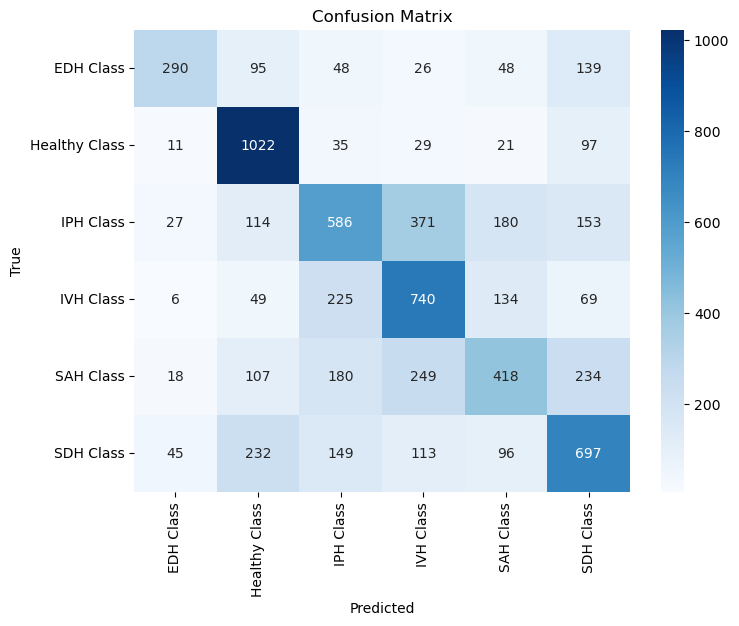

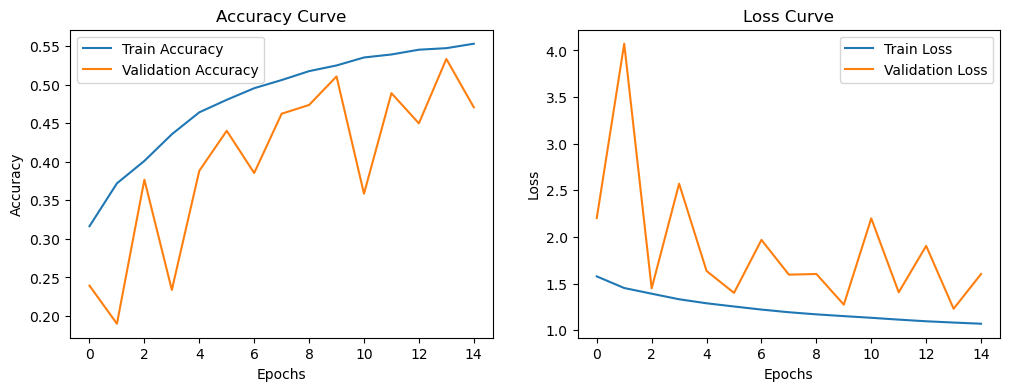

In [7]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Early stopping & checkpointing
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Handle Class Imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Train the Model
cnn_model = build_cnn_model(num_classes=len(train_generator.class_indices))

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_cnn_model_retrained_1.h5", save_best_only=True, monitor='val_accuracy')
]

history = cnn_model.fit(
    train_generator,
    epochs=15,   # longer training
    validation_data=val_generator,
    class_weight=class_weights,   # handle imbalance
    callbacks=callbacks
)

# Evaluate the Model
test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Classification Report & Confusion Matrix
y_pred = cnn_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot Training Curves
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()


In [6]:
from tensorflow.keras.models import load_model

# Load the model from file
model = load_model("best_cnn_model_retrained_1.h5")

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
def predict_image(img_path, model, class_labels):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_name = class_labels[class_index]
    
    print(f"Prediction: {class_name} ({prediction[0][class_index]*100:.2f}%)")
    return class_name
    

# Example usage
class_labels = ['EDH Class', 'Healthy Class', 'IPH Class','IVH Class', 'SAH Class', 'SDH Class']
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/EDH Class/IM_0004-ID_c9849b01e - Copy.png",model , class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/EDH Class/IM_0009-ID_d66c83703 - Copy.png",model , class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/EDH Class/IM_0011-ID_c971c9888.png",model , class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/EDH Class/IM_0012-ID_e19a94e42.png",model , class_labels)
predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/EDH Class/IM_0015-ID_57c30b661.png",model , class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: EDH Class (25.88%)


'EDH Class'

In [33]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, class_labels):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_name = class_labels[class_index]
    
    print(f"Prediction: {class_name} ({prediction[0][class_index]*100:.2f}%)")
    return class_name

# Example usage
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/Healthy Class/IM_0009-ID_3d5303892.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/Healthy Class/IM_0009-ID_a6e50ba55.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/Healthy Class/IM_0010-ID_07e8aeb0f.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/Healthy Class/IM_0010-ID_8da913b5a.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/Healthy Class/IM_0010-ID_15a09ee6b.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/Healthy Class/IM_0010-ID_41c6c7f53.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/Healthy Class/IM_0010-ID_41d7fc348.png", model, class_labels)
predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/Healthy Class/IM_0010-ID_206a0196d.png", model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Prediction: Healthy Class (79.29%)


'Healthy Class'

In [42]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, class_labels):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_name = class_labels[class_index]
    
    print(f"Prediction: {class_name} ({prediction[0][class_index]*100:.2f}%)")
    return class_name

# Example usage
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IPH Class/IM_0007-ID_1c6f747cd.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IPH Class/IM_0005-ID_510f93c45.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IPH Class/IM_0006-ID_ddde3c907.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IPH Class/IM_0009-ID_0dffdf297.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IPH Class/IM_0008-ID_14c547dd4.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IPH Class/IM_0009-ID_7735ad402.png", model, class_labels)
predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IPH Class/IM_0009-ID_a1f315320.png", model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: IPH Class (52.21%)


'IPH Class'

In [47]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, class_labels):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_name = class_labels[class_index]
    
    print(f"Prediction: {class_name} ({prediction[0][class_index]*100:.2f}%)")
    return class_name

# Example usage
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IVH Class/IM_0008-ID_22c91ae8c.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IVH Class/IM_0009-ID_f8323b064.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IVH Class/IM_0007-ID_801606567.png", model, class_labels)
predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IVH Class/IM_0010-ID_8cfef703d.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IVH Class/IM_0008-ID_402605bdd.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/IVH Class/IM_0009-ID_0dc930ca4.png", model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: IVH Class (78.20%)


'IVH Class'

In [55]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, class_labels):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_name = class_labels[class_index]
    
    print(f"Prediction: {class_name} ({prediction[0][class_index]*100:.2f}%)")
    return class_name

# Example usage
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/SDH Class/IM_0007-ID_e970dcde0.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/SDH Class/IM_0008-ID_5b7822800.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/SDH Class/IM_0007-ID_f0e951018.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/SDH Class/IM_0008-ID_111e6d0c9.png", model, class_labels)
predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/SDH Class/IM_0008-ID_247b408ec.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/SDH Class/IM_0007-ID_e970dcde0.png",model, class_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Prediction: SDH Class (84.06%)


'SDH Class'

In [63]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, class_labels):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_name = class_labels[class_index]
    
    print(f"Prediction: {class_name} ({prediction[0][class_index]*100:.2f}%)")
    return class_name

# Example usage
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/SAH Class/IM_0006-ID_81a9d3c6e.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/SAH Class/IM_0008-ID_c99e9d176.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/SAH Class/IM_0008-ID_eb38e6f63.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/SAH Class/IM_0007-ID_b72fc6d1c.png", model, class_labels)
#predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/SAH Class/IM_0009-ID_16e7cfb10.png", model, class_labels)
predict_image("D:/KaggleDatasets/Brain_hemorrhage/DATASET/test/SAH Class/IM_0009-ID_38c82ee8b.png",model, class_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction: SAH Class (62.24%)


'SAH Class'